Exploratory Data Analysis on Insurance dataset
===

### Data Description : 
The data at hand contains medical costs of people characterized by certain attributes.

### Context :
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have. 

## 1. Import the necessary libraries

In [1]:
# import the standard libraries
import pandas as pd
import numpy as np

# import statistical analysis libraries
from scipy.stats import ttest_ind, pearsonr
from statsmodels.stats.proportion import proportions_ztest

#import the visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## 2. Read the insurance data as dataframe

In [2]:
#Read data as dataframe
insurance_data = pd.read_csv("insurance.csv")

In [3]:
#display first 5 records of data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#display size of data
insurance_data.size

9366

In [5]:
#Column names in dataframe
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 3. Perform EDA
### 3 a. Shape of the data

In [6]:
#shape of data
insurance_data.shape

(1338, 7)

#### The data has 1338 rows and 7 columns

### 3 b. Data type of each attribute

In [7]:
#get data type of all attributes
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### The data has 4 numerical attributes - 'age', 'bmi', 'children', 'charges' and 3 categorical attributes - 'sex', 'region', 'smoker'

### 3 c. Checking the presence of missing values

In [8]:
#get a summary of the dataframe
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#check missing values
insurance_data.isna().sum()
#Alternatively, 'isnull' can be used to check missing values
#insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data

### 3 d. 5 point summary of numerical attributes 

In [10]:
#get the 5 point summary of numerical attributes using describe()
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3 e. Distribution for numerical attributes

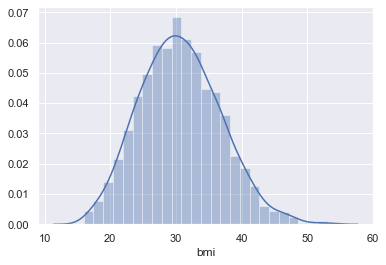

In [11]:
# Distribution of 'bmi' attribute
sns.distplot(insurance_data['bmi']);

In [12]:
# The 'bmi' attribute seems to be normally distributed

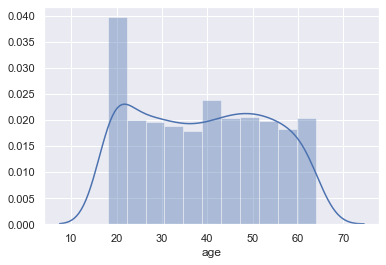

In [13]:
# Distribution of 'age' attribute
sns.distplot(insurance_data['age']);

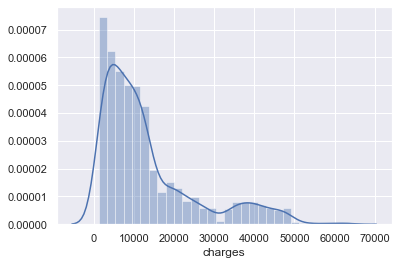

In [14]:
# Distribution of 'charges' attribute
sns.distplot(insurance_data['charges']);

In [15]:
# The distribution for 'charges' is skewed right.

### 3 f. Measure of skewness for 'bmi', 'age', 'charges'

In [16]:
#Measure of skewness
insurance_data.skew(axis = 0) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### Skew for 'bmi' = 0.28 -> it is nearly a normal distribution with slightly right skewed
#### Skew for 'age' = 0.055 -> it is nearly a normal distribution
#### Skew for 'charges' = 1.52 -> it is right skewed

### 3 g. Check presence of outliers

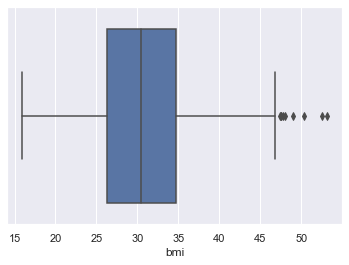

In [17]:
# Check outliers in 'bmi' using boxplot
sns.boxplot(insurance_data['bmi']);

#### 'bmi' has outliers beyond Q3 between 46 and 53

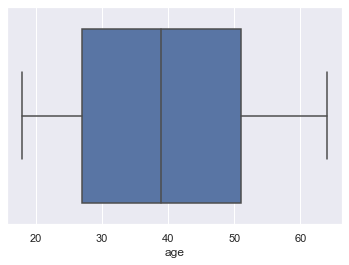

In [18]:
# Check outliers in 'age' using boxplot
sns.boxplot(insurance_data['age']);

#### 'age' does not have any outliers as all data points lie between (+/-)1.5 IQR range

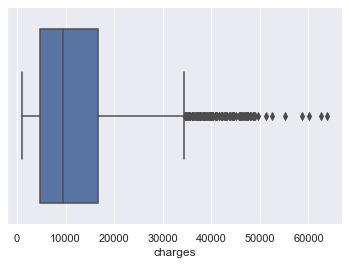

In [19]:
# Check outliers in 'charges' using boxplot
sns.boxplot(insurance_data['charges']);

#### 'charges' has outliers beyond Q3 between 30000 and 64000

### 3 h. Distribution of categorical columns

In [20]:
# get count of males and females
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

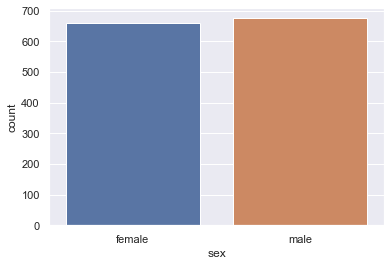

In [21]:
# plot the count of male and females
sns.countplot(insurance_data['sex']);

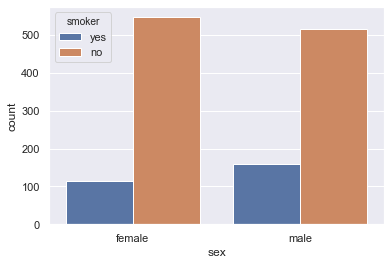

In [22]:
# plot the count of male and females who are smokers
sns.countplot(insurance_data['sex'], hue=insurance_data['smoker']);

In [23]:
# Count of non-smokers is higher than smokers for both male and female.

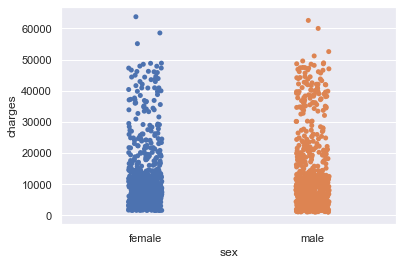

In [24]:
# Plot distribution of 'sex' with 'charges' along the y-axis
sns.stripplot(insurance_data['sex'], insurance_data['charges'], jitter=True);

In [25]:
# get number of smokers and non-smokers
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

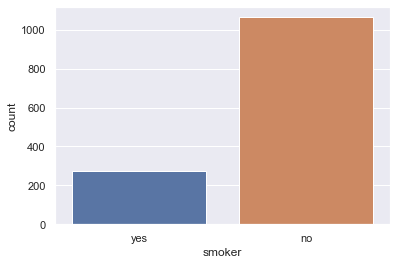

In [26]:
# plot number of smokers and non-smokers
sns.countplot(insurance_data['smoker']);

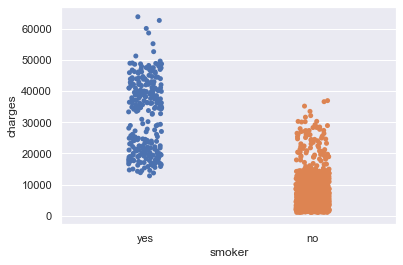

In [27]:
# Plot distribution of 'smoker' with 'charges' along the y-axis
sns.stripplot(insurance_data['smoker'], insurance_data['charges'], jitter=True);

In [28]:
# get count across regions
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

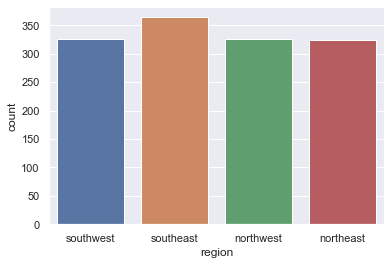

In [29]:
# Plot count of records across regions
sns.countplot(insurance_data['region']);

In [30]:
# All regions have nearly equal count

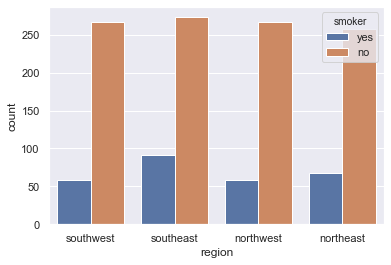

In [31]:
# Plot number of smokers across regions
sns.countplot(insurance_data['region'], hue=insurance_data['smoker']);

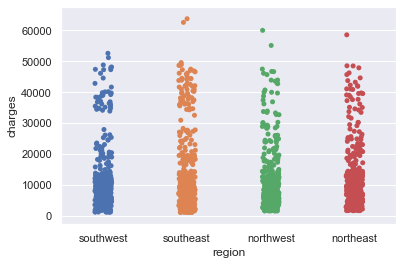

In [32]:
# Plot distribution of 'region' with 'charges' along the y-axis
sns.stripplot(insurance_data['region'], insurance_data['charges'], jitter=True);

In [33]:
# get the count of children
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

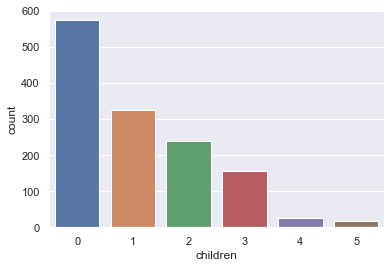

In [34]:
# plot the count of children
sns.countplot(insurance_data['children']);

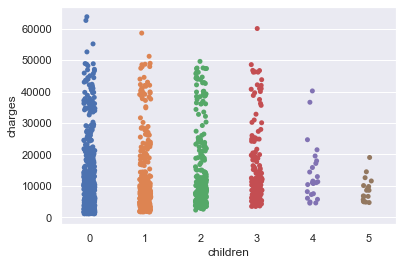

In [35]:
# Plot distribution of 'children' with 'charges' along the y-axis
sns.stripplot(insurance_data['children'], insurance_data['charges'], jitter=True);

### 3 i. Pair plot that includes all the columns of the data frame

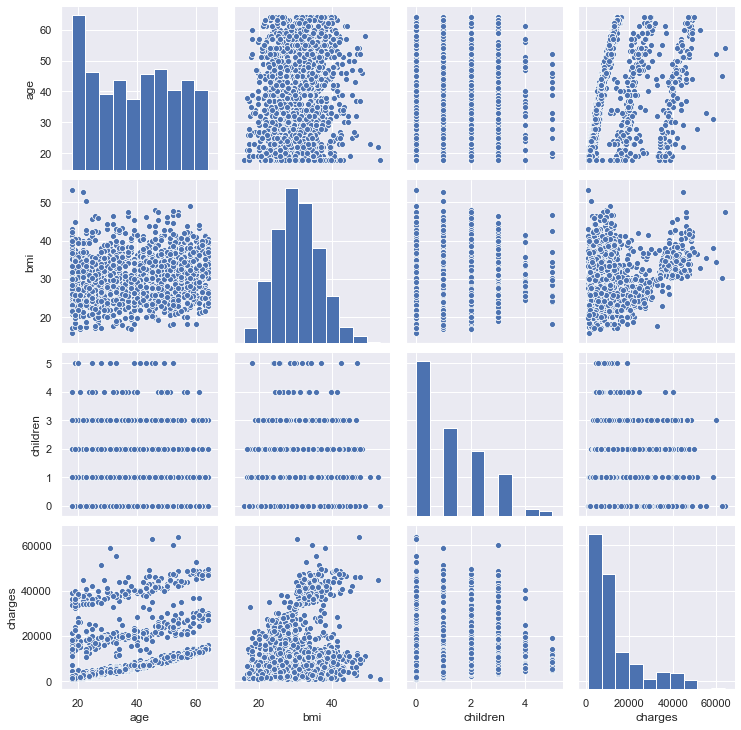

In [36]:
# Display pairplot for insurance data
sns.pairplot(insurance_data); 

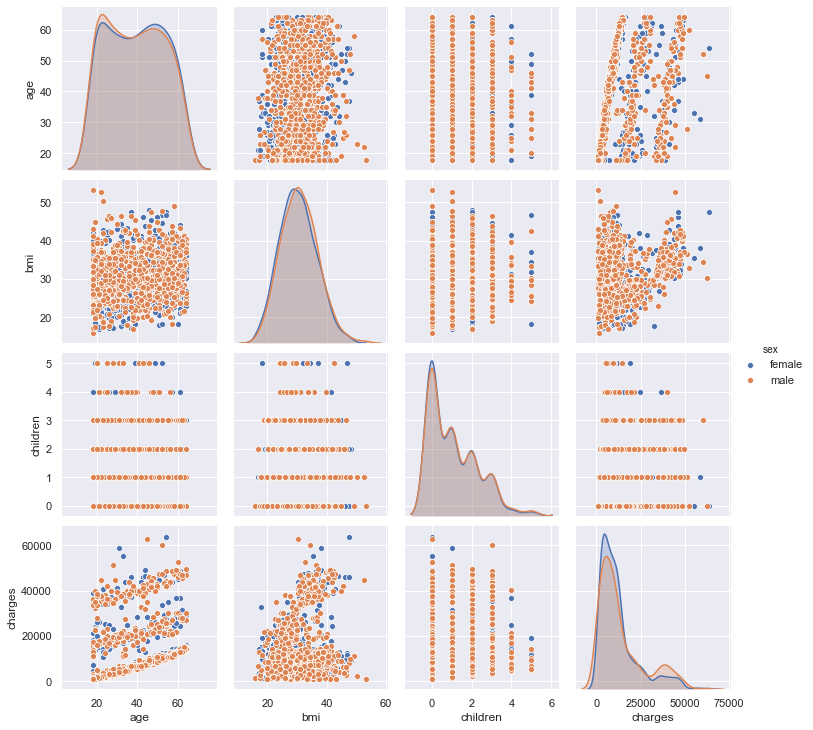

In [37]:
# Display pairplot with categorical attribute 'sex'
sns.pairplot(insurance_data, hue='sex');

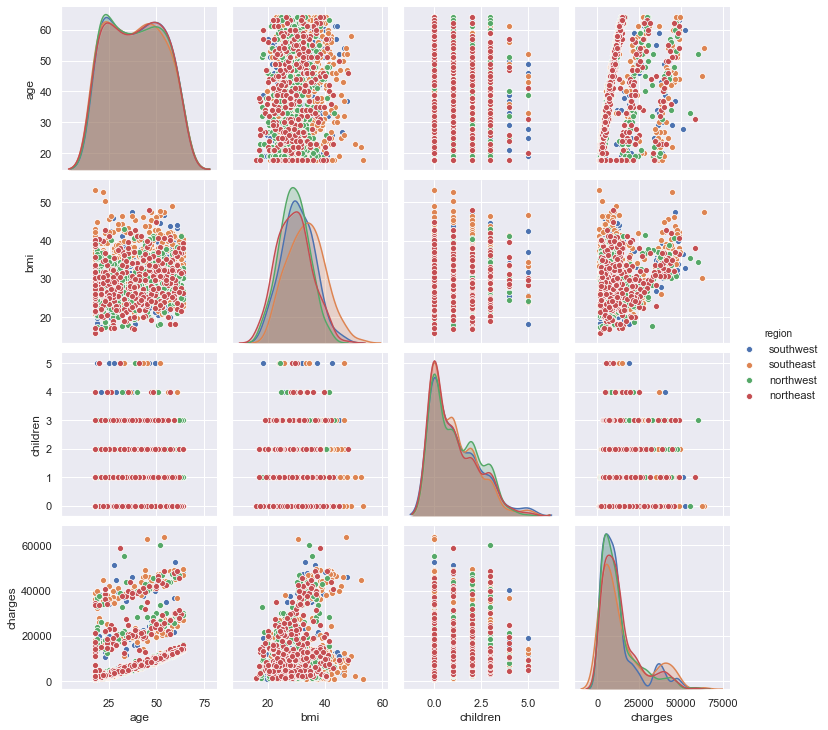

In [38]:
# Display pairplot with categorical attribute 'region'
sns.pairplot(insurance_data, hue='region');

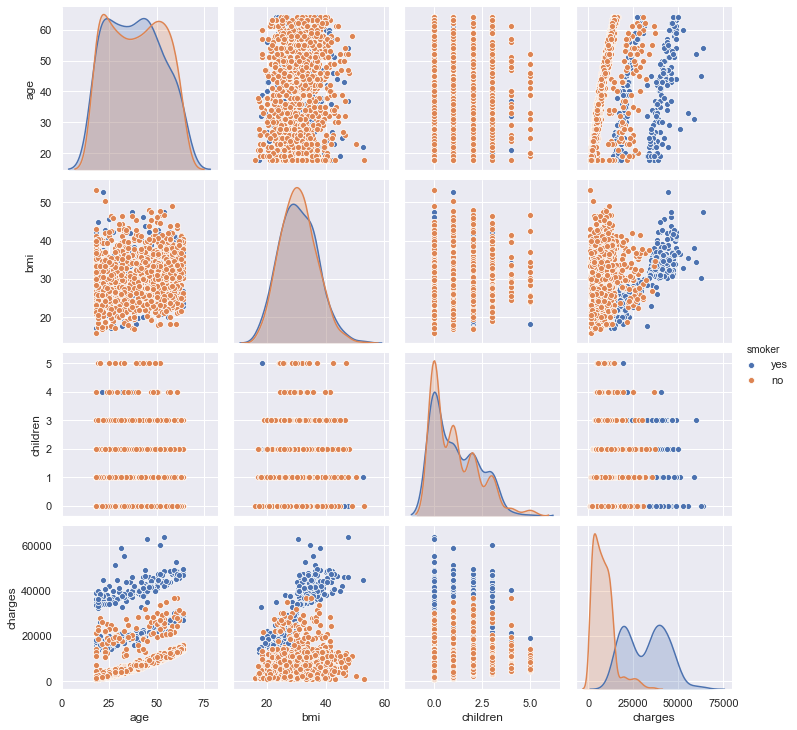

In [39]:
# Display pairplot with categorical attribute 'smoker'
sns.pairplot(insurance_data, hue='smoker');

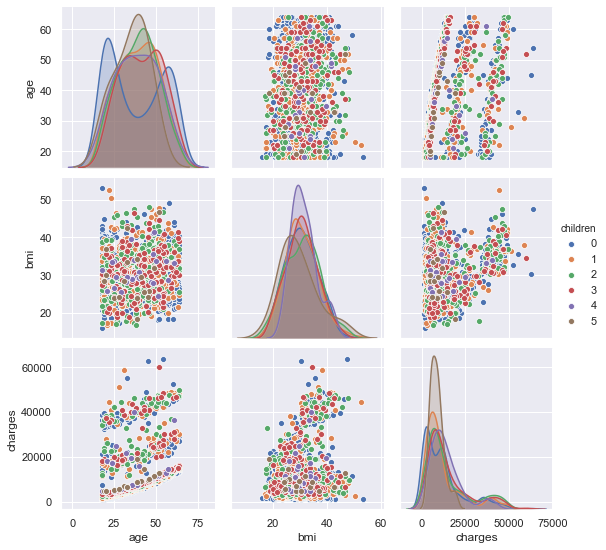

In [40]:
# Display pairplot with 'children'
sns.pairplot(insurance_data, hue='children');

## 4. Perform statistical analysis
### 4 a. Do charges of people who smoke differ significantly from the people who don't? 

#### Defining the Null hypothesis:
#### Null Hypothesis (H0) -> "there is no significant difference in charges for smokers"
#### Alternate hypothesis (H1) -> "there is significant difference in charges for smokers"

In [41]:
#get charges for smokers
grp1 = np.array(insurance_data[insurance_data['smoker'] == 'yes']['charges'])

#get charges for non smokers
grp2 = np.array(insurance_data[insurance_data['smoker'] == 'no']['charges'])

In [42]:
#perform independent T-test
t, p_value = ttest_ind(grp1, grp2, axis =0)
print("t-statistic : {}  p-value : {}".format(t,p_value))

t-statistic : 46.664921172723716  p-value : 8.271435842177219e-283


In [43]:
if p_value < 0.05:
    print("Reject H0: there is significant difference in charges for smokers")
else:
    print("Fail to reject H0: there is no significant difference in charges for smokers")

Reject H0: there is significant difference in charges for smokers


#### We will reject null hypothesis. There is difference in charges for smokers and non-smokers.

## 4 b. Does bmi of males differ significantly from that of females? 

#### Defining the Null hypothesis:
#### Null Hypothesis (H0) -> "there is no significant difference in bmi for male and female"
#### Alternate hypothesis (H1) -> "there is significant difference in bmi for male and female" 

In [44]:
#get 'bmi' values for males
male_grp = np.array(insurance_data[insurance_data['sex'] == 'male']['bmi'])

#get 'bmi' values for females
female_grp = np.array(insurance_data[insurance_data['sex'] == 'female']['bmi'])

In [45]:
#perform independent T-test
t, p_value = ttest_ind(male_grp, female_grp, axis=0)
print("t-statistic : {}  p-value : {}".format(t, p_value))

t-statistic : 1.696752635752224  p-value : 0.08997637178984932


In [46]:
if p_value < 0.05:
    print("Reject H0 : there is significant difference in bmi for male and female")
else:
    print("Fail to reject H0: there is no significant difference in bmi for male and female")

Fail to reject H0: there is no significant difference in bmi for male and female


#### We fail to reject the null hypothesis. There is no significant difference in bmi for males and females.

### 4 c. Is the proportion of smokers significantly different in different genders?

#### Defining the Null hypothesis:
#### Null Hypothesis (H0) -> "there is no significant difference in proportion of smokers in different genders"
#### Alternate hypothesis (H1) -> "there is significant difference in proportion of smokers in different genders" 

In [47]:
#get number of female smokers
female_smokers = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]

#get number of male smokers
male_smokers = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1]

#total number of females in data
n_females = insurance_data.sex.value_counts()[1]

#total number of males in data
n_males = insurance_data.sex.value_counts()[0]

print([female_smokers, male_smokers], [n_females, n_males])

[115, 159] [662, 676]


In [48]:
print(f' Proportion of smokers in females = {round(female_smokers/n_females,2)} and males = {round(male_smokers/n_males,2)}')

 Proportion of smokers in females = 0.17 and males = 0.24


In [49]:
#Perform z-test of proportions
stat, p_value = proportions_ztest([female_smokers, male_smokers], [n_females, n_males])
print("z-statistic : {}  p-value : {}".format(stat,p_value))

z-statistic : -2.7867402154855503  p-value : 0.005324114164320532


In [50]:
if p_value < 0.05:
    print("Reject H0: there is significant difference in proportion of smokers in different genders")
else:
    print("Fail to reject H0: there is no significant difference in proportion of smokers in different genders")

Reject H0: there is significant difference in proportion of smokers in different genders


#### We reject the null hypothesis. There is significant difference in proportion of smokers in males and females.

### 4 d. Is the distribution of bmi across women with no children, one child and two children, the same?

#### Defining the Null hypothesis:
#### Null Hypothesis (H0) -> "distribution of bmi across women with no children,one child and two children is not same"
#### Alternate hypothesis (H1) -> "distribution of bmi across women with no children,one child and two children is same"

In [51]:
# Subset the data on females with 0, 1 and 2 children
data_subset = insurance_data[(insurance_data['sex']=='female') & (insurance_data['children']<=2)]
data_subset.children.value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [52]:
# Calculate Pearson's Correlation Coefficient for normal distribution
coeff, p_value = pearsonr(data_subset['bmi'], data_subset['children'])
print("Pearson's coefficient : {}  p-value : {}".format(coeff,p_value))

Pearson's coefficient : 0.01101278435145415  p-value : 0.7937600294540473


In [53]:
if p_value < 0.05:
    print("Reject H0: distribution of bmi across women with no children,one child and two children is same")
else:
    print("Fail to reject H0: distribution of bmi across women with no children,one child and two children is not same")

Fail to reject H0: distribution of bmi across women with no children,one child and two children is not same


#### We fail to reject null hypothesis. The distribution of bmi across women with no children, one child and two children is not same.

### End of notebook